# DATA VISUALIZATION WITH SEABORN EXPLAINED

The first thing to do is to import the following libraries:

Pandas for data manipulation

Matplotlib for basic visualization 

Seaborn for improved and interactive visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The first dataset is a set of vehicle information 

The second data set is information about police killings in the United States

In [2]:
#Import the data sets
vehicles = pd.read_csv('vehicles.csv')
police_killings = pd.read_csv('PoliceKillingsUS.csv', encoding = 'Windows-1252')

In [3]:
#Check the general info of the dataset
police_killings.info()
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 13 columns):
id                         2535 non-null int64
name                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(9)
memory usage: 222.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 16 columns):
barrels08         37843 non-null float64
co2TailpipeGpm    37843 non-null float64
cylinders

In [4]:
#get a glimpse of both datasets
police_killings.head(3)

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


In [5]:
vehicles.head(3)

,barrels08,co2TailpipeGpm,cylinders,drive,eng_dscr,fuelCost08,fuelType,fuelType1,make,model,mpgData,phevBlended,trany,VClass,year,youSaveSpend
0,15.695714,423.190476,4.0,Rear-Wheel Drive,(FFS),1600,Regular,Regular Gasoline,Alfa Romeo,Spider Veloce 2000,Y,False,Manual 5-spd,Two Seaters,1985,-1250
1,29.964545,807.909091,12.0,Rear-Wheel Drive,(GUZZLER),3050,Regular,Regular Gasoline,Ferrari,Testarossa,N,False,Manual 5-spd,Two Seaters,1985,-8500
2,12.207778,329.148148,4.0,Front-Wheel Drive,(FFS),1250,Regular,Regular Gasoline,Dodge,Charger,Y,False,Manual 5-spd,Subcompact Cars,1985,500


## Univariate Visualizations

Seaborn allows us visualize the distributions of variables in our datasets

Let us visualize some with more details in one plot than regular matplotlib allows us

### Numerical Variables

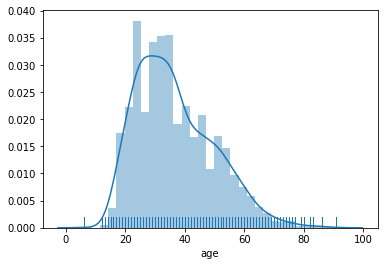

In [6]:
'''visualize the dsitribution of victims age in the police shooting dataset with 
a kernel density plot and a rug of the variables'''

sns.distplot(police_killings['age'].dropna(), kde=True, rug=True)

We can see the distribution of the age of the victims of police shootings along with a kernel density plot and the values represented as rugs

We can even decide to plot only the KDE plot without the histogram

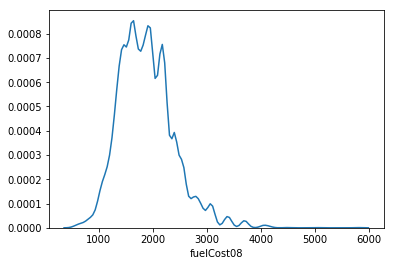

In [7]:
sns.distplot(vehicles['fuelCost08'].dropna(), hist = False)

We can also plot boxplots for numerical variables as can be seen below 

A box plot helps us detect outliers easily as can be seen below. The black dots outside the main plot area indicates outlier variables

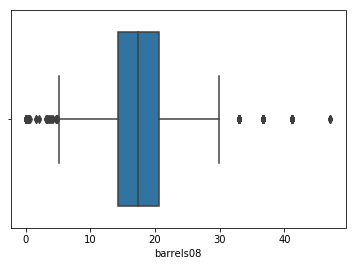

In [8]:
sns.boxplot(vehicles['barrels08'].dropna())

### Categorical Variables

We can use count plots to view the frequency counts of each categorical variable so as to get an idea of their distributions

We can view the distribution of the types of wheel drives in the vehicle dataset

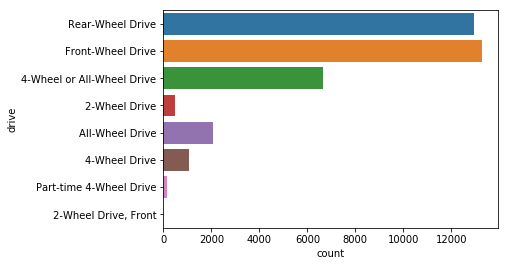

In [9]:
sns.countplot(y="drive", data=vehicles)

We can view the distribution of the manner of death for the police killings data set

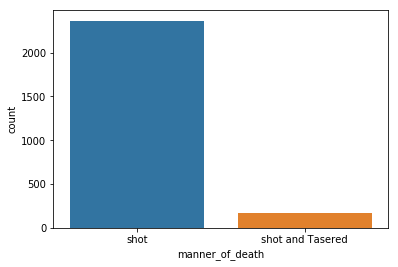

In [10]:
sns.countplot(x='manner_of_death', data=police_killings)

## BiVariate Visualization

### Numerical Visualization

The easiest way to visualize two numerical variables by plotting scatter plots. 

We can do this for all numerical variables in both our datasets by using the seaborn pairplot function. 

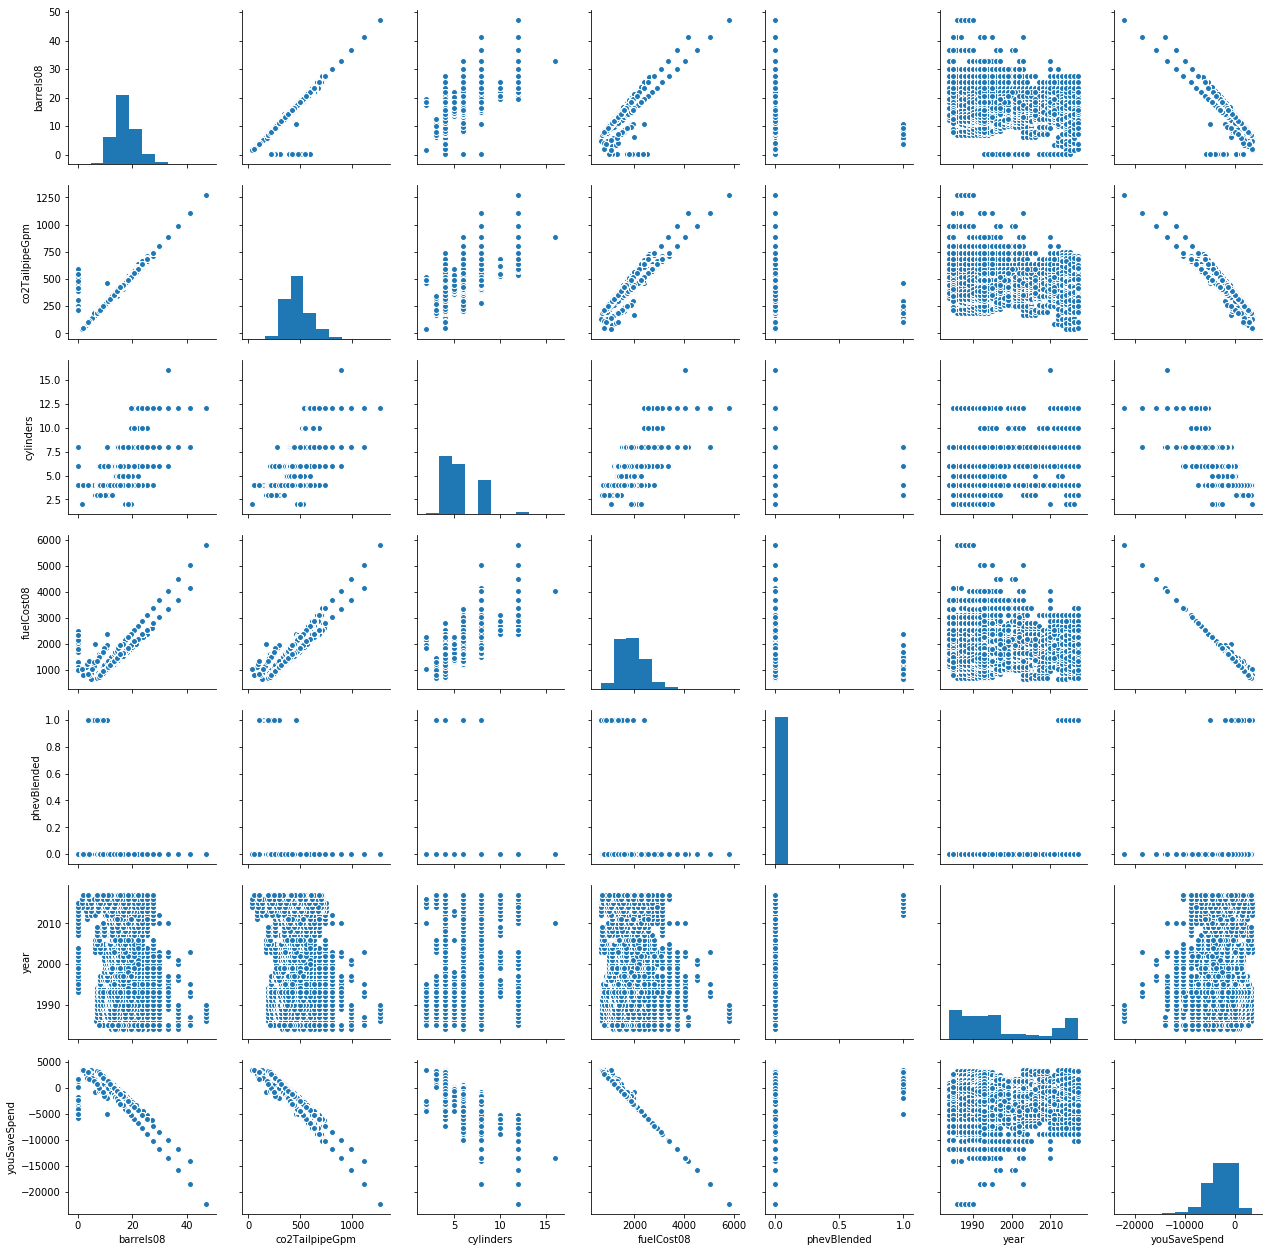

In [11]:
sns.pairplot(vehicles.dropna()) 

As we can see from above, the distribution between different some numerical variables are linear, whilst others are weird

We can also visualize linear relationships in detail using a regression plot as shown below

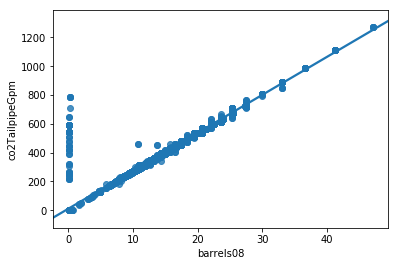

In [12]:
sns.regplot(x="barrels08", y="co2TailpipeGpm", data=vehicles)

### Categorical Variables

We can view the counts of categorical variables with each category further categorized by another categorical variable. 

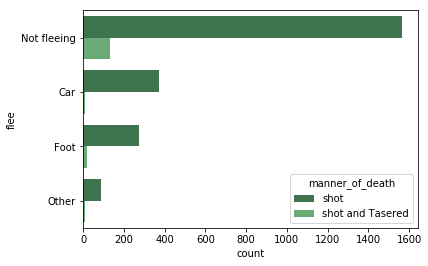

In [13]:
sns.countplot(y="flee", hue="manner_of_death", data=police_killings, palette="Greens_d");

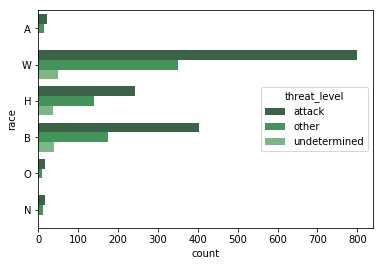

In [14]:
sns.countplot(y="race", hue="threat_level", data=police_killings, palette="Greens_d");

### Categorical and Numerical

We begin with strip plots. 

This is essentially just a scatter plot for categorical variables based on a numerical variable

We will view the relationship between the barrels and the type of wheel drive of each vehicle

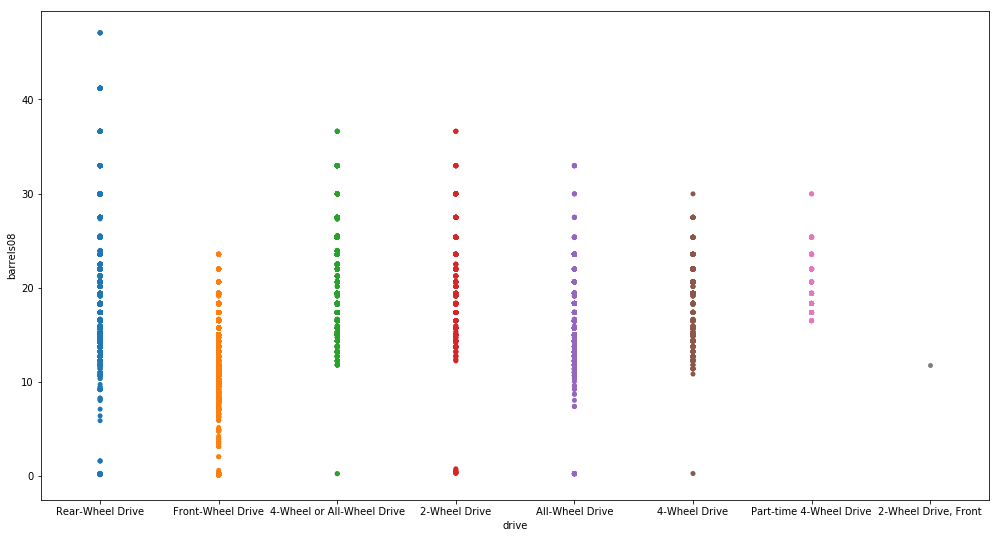

In [15]:
plt.figure(figsize=(17,9))
sns.stripplot(x="drive", y="barrels08", data=vehicles)

We can also use the jitter argument to show the positions of points on the categorical axis

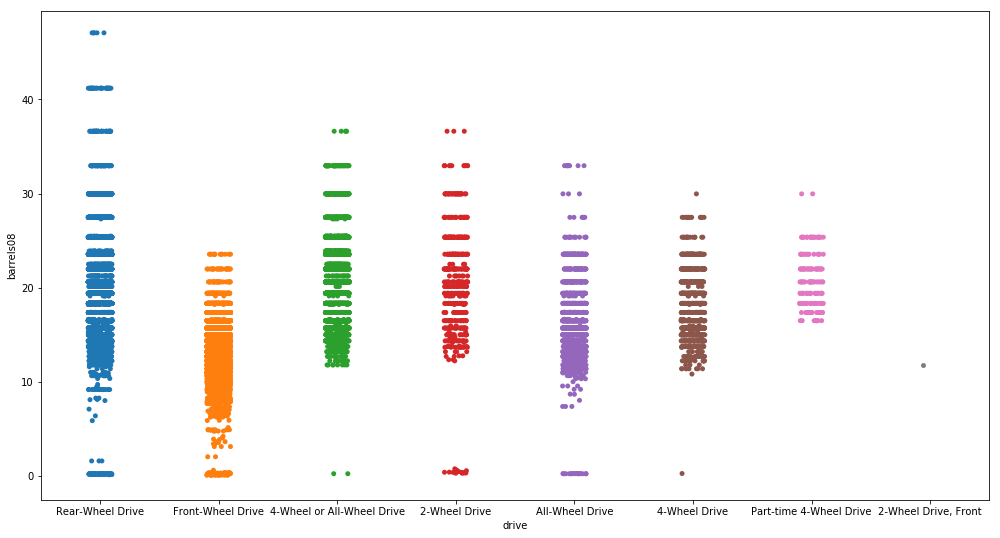

In [16]:
plt.figure(figsize=(17,9))
sns.stripplot(x="drive", y="barrels08", data=vehicles, jitter = True)

Bar plots are also important in viewing the relationship between a categorical and numerical variable

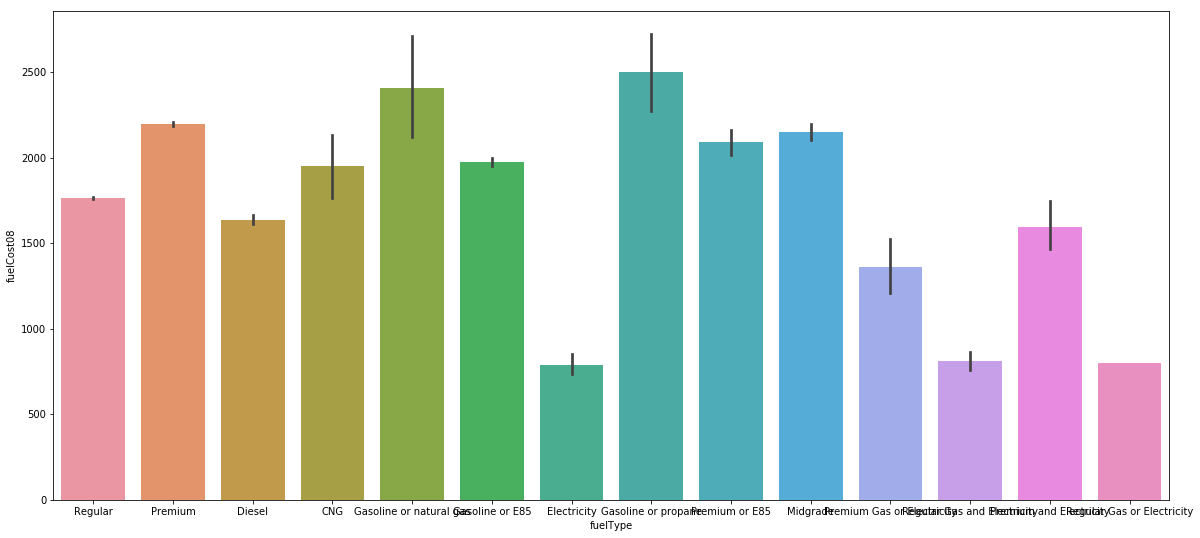

In [17]:
#We can view the distribution between fuel type and fuel cost

plt.figure(figsize=(20,9))
sns.barplot(x = 'fuelType', y = 'fuelCost08', data = vehicles)

Boxplots are also important bivariate plots for categorical vs numerical data types

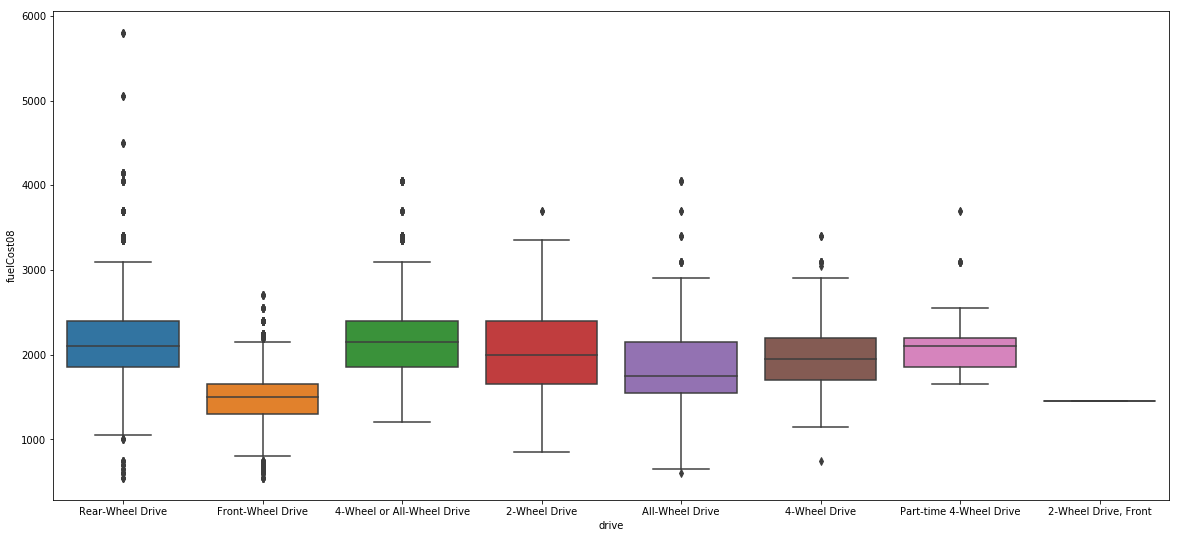

In [18]:
#We can view the distribution between drive type and fuel cost

plt.figure(figsize=(20,9))
sns.boxplot(x = 'drive', y = 'fuelCost08', data = vehicles)

## Multivariate plots

We can plot pairplots while using categorical variables as a point of reference. 

This is done by setting the categorical variable as a hue in the pairplot function

Now, we pair plot numerical variables using the mpgData as a point of reference

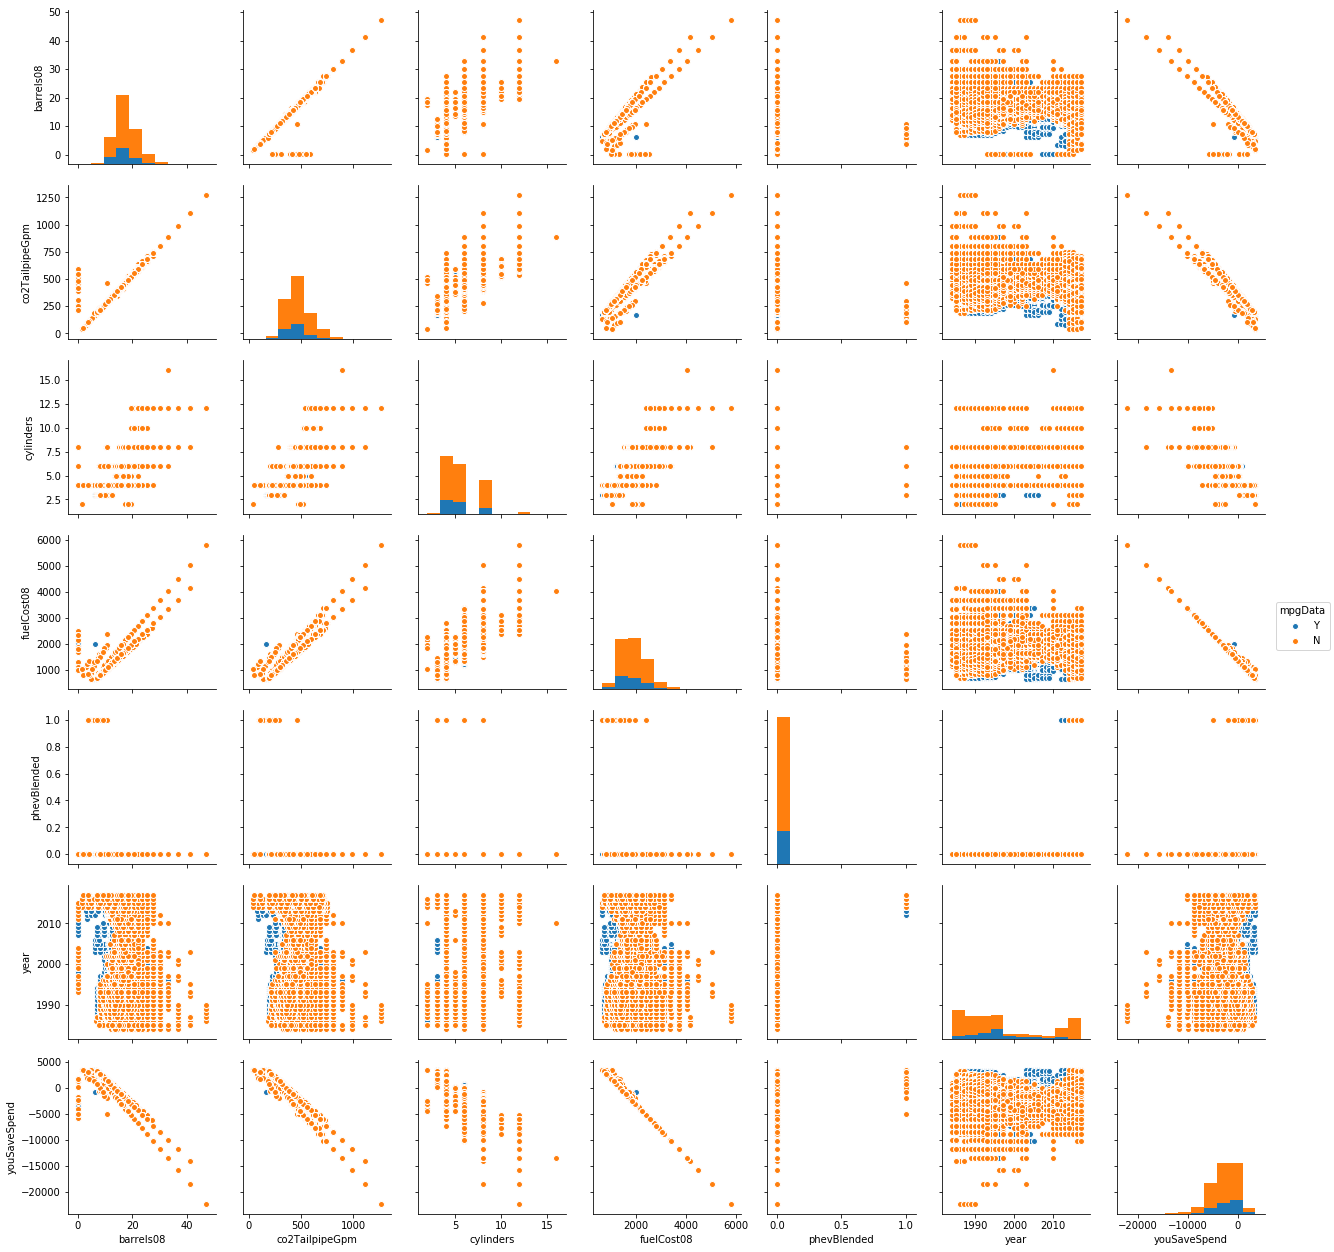

In [19]:
sns.pairplot(vehicles.dropna(), hue='mpgData')

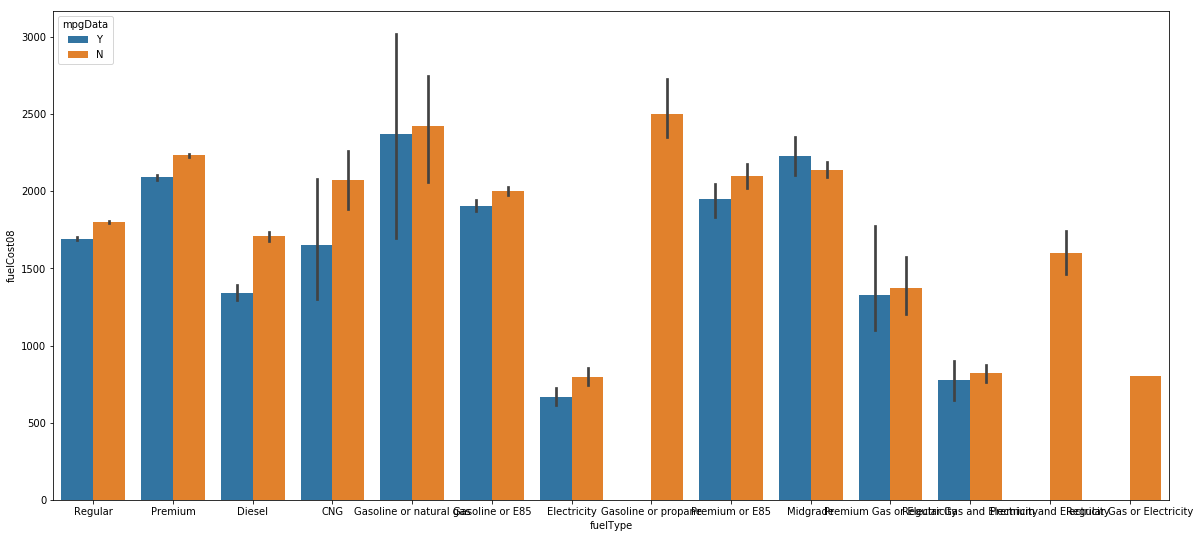

In [20]:
# We can also view barplots with a categorical hue reference

plt.figure(figsize=(20,9))
sns.barplot(x = 'fuelType', y = 'fuelCost08', hue = 'mpgData' ,data = vehicles)

Correlation heatmaps are also good in viewing the correlation between variables

Text(0.5,1,'Correlation Matrix')

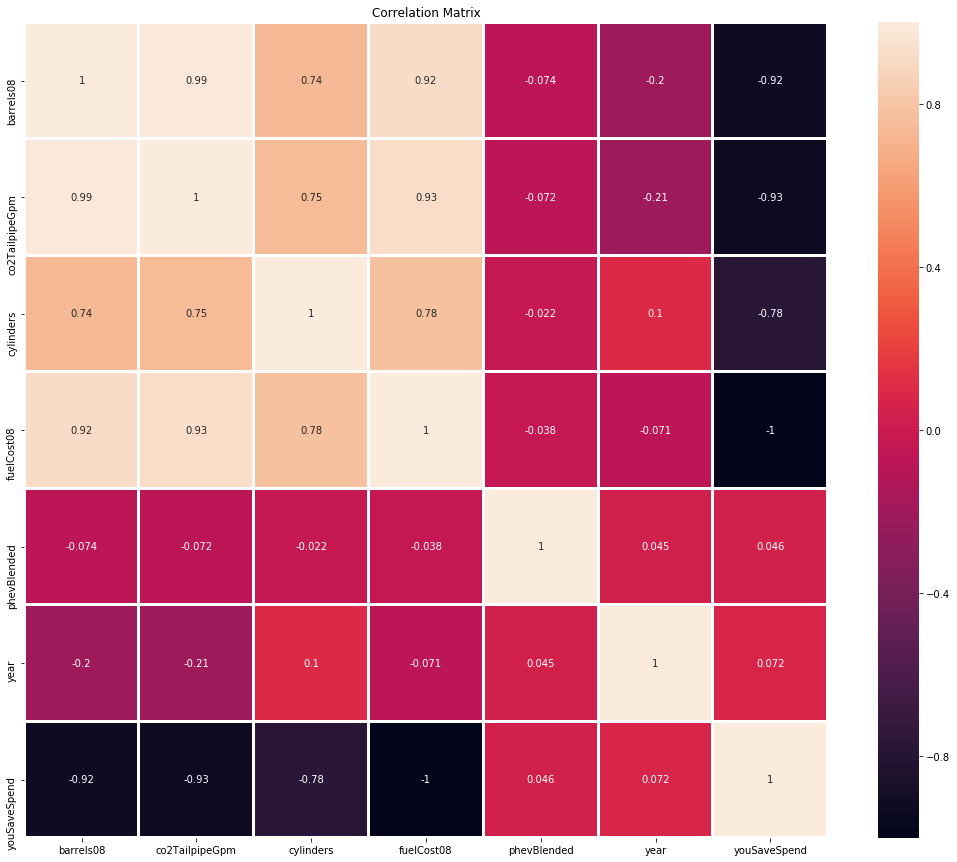

In [21]:
# Correlation matrix between features 
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(vehicles.corr(),linewidths=2.0, ax=ax , annot=True)
ax.set_title('Correlation Matrix')


## 3D Plots

Text(0.5,0,'Fuel Cost')

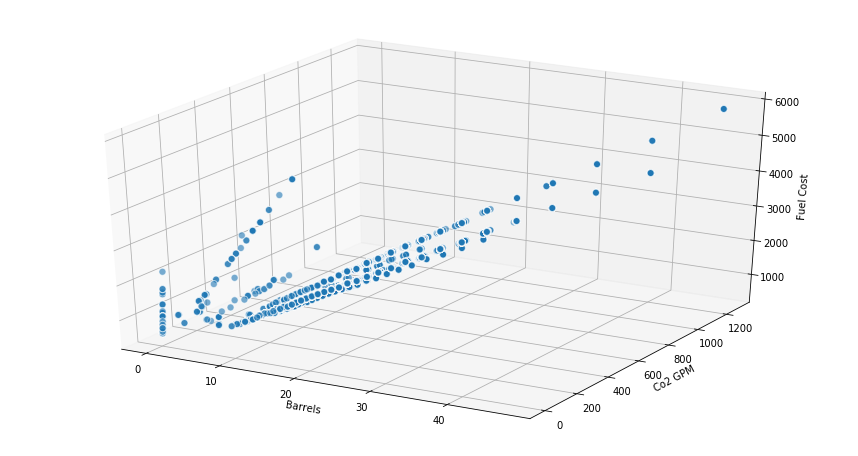

In [22]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection = '3d')

xv = vehicles['barrels08']
yv = vehicles['co2TailpipeGpm']
zv = vehicles['fuelCost08']
ax.scatter(xv, yv, zv, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Barrels')
ax.set_ylabel('Co2 GPM')
ax.set_zlabel('Fuel Cost')

There you have it - Data Visulaization with Seaborn Explained in a nutshell